In [306]:
path = os.path.join("C:\\Users\\Robin\\Desktop\\deep_learning")
label = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[0]
image = np.load(path+"\\processed_data\\v3_absolute_grape_changeling-12_2293-4124NDTRAIN.npy", allow_pickle=True)[1]
original_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\NDTRAIN.npy", allow_pickle=True)[0]
og_label = np.load(path+"\\MineRLNavigateDense-v0\\v3_absolute_grape_changeling-12_2293-4124\\rendered.npz", allow_pickle=True)
#print(label)
#print(len(label))
data_params = ['reward', 'observation$compassAngle', 'observation$inventory$dirt', 'action$forward', 'action$left', 'action$back', 'action$right', 'action$jump', 'action$sneak', 'action$sprint', 'action$attack', 'action$camera', 'action$place']

print([len(og_label[i]) for i in data_params[3:]])
print(label.shape)
print(label)
actual_frames = len(og_label["reward"])
#image = image[-actual_frames:]
print(image.shape)


file_names = [folder_name for folder_name in os.listdir(path+"\\MineRLNavigateDense-v0")]

train_data = file_names[:160]
#train_data = file_names[:2]
valid_data = file_names[160:190]

#idx = 0

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size):
        self.batch_size = batch_size
        self.data = data
        self.video_file_no = 0
        self.video_frame_no = batch_size

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
    
    '''def __next__(self):
        return self.getitem()'''

    def __getitem__(self, idx):
        #batch_x = self.data[idx * self.batch_size : (idx+1) * self.batch_size]
        video = self.data[self.video_file_no]
        
        image_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[0]])
        label_part = np.array([np.load(path+"\\MineRLNavigateDense-v0\\"+video+"\\NDTRAIN.npy", allow_pickle=True)[1]])[0][:10]
        print(label_part)
        
        print(image_part.shape)
        no_of_frames = int(np.array(image_part[0]).shape[0]/12288)
        image_part = np.array(image_part[0]).reshape(no_of_frames, 64, 64, 3)[-label_part[0].shape[0]:]
        image_part = np.asarray(image_part[idx * self.batch_size : (idx+1) * self.batch_size]).astype("float32")
        image_part = image_part.reshape(-1, 64, 64, 3)
        plt.imshow(np.array(image_part).astype(np.uint8)[-1])
        plt.show()
        
        print(np.array(image_part).dtype)
        print(np.array(image_part).shape)
        print(np.array([image_part, label_part]).shape)
        
        self.video_frame_no += batch_size
        if self.video_frame_no > no_of_frames and len(self.data) != self.video_file_no:
            self.video_file_no += 1
        
        label_part = label_part[idx * self.batch_size : (idx+1) * self.batch_size]
            
        return image_part, label_part[0]
    
batch_size = 1

training_gen = DataGenerator(train_data, batch_size)
valid_gen = DataGenerator(valid_data, batch_size)

#dg = DataGenerator(file_names, batch_size)
#for x in range(2):
    #plt.imshow(np.array(next(dg))[0].reshape(1792, 64, 64, 3).astype(np.uint8)[50])
    #plt.imshow(np.array(next(dg))[0].astype(np.uint8)[10])
    #plt.show()

#print(DataGenerator())

[1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792, 1792]
(16129,)
[0 0 0 ... 0 0 0]
(1832, 64, 64, 3)


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import tensorflow as tf
import tqdm
import os

[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)
 array([43.1077338, 43.1077338, 41.1531552, ..., 72.5655132, 76.9193172,
       82.1106144])
 array([0, 0, 0, ..., 8, 8, 8])
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64)
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]
(1, 22511616)


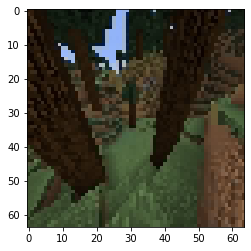

float32
(1, 64, 64, 3)
(2,)
[array([ 0.0000000e+00,  6.3092217e-02,  2.1552046e-01, ...,
       -8.5000791e-02, -8.9136705e-02,  9.9913994e+01], dtype=float32)
 array([43.1077338, 43.1077338, 41.1531552, ..., 72.5655132, 76.9193172,
       82.1106144])
 array([0, 0, 0, ..., 8, 8, 8])
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64)
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]
(1, 22511616)


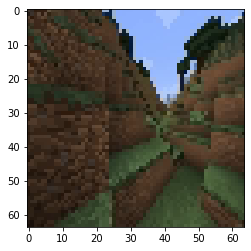

float32
(1, 64, 64, 3)
(2,)


UnknownError:  IndexError: index 0 is out of bounds for axis 0 with size 0
Traceback (most recent call last):

  File "C:\Users\Robin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\script_ops.py", line 243, in __call__
    ret = func(*args)

  File "C:\Users\Robin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\autograph\impl\api.py", line 309, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\Robin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 785, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Robin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 801, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\Robin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 932, in generator_fn
    yield x[i]

  File "<ipython-input-306-09889715616f>", line 65, in __getitem__
    return image_part, label_part[0]

IndexError: index 0 is out of bounds for axis 0 with size 0


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_19952]

Function call stack:
train_function


In [307]:
conv = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, 5, activation="relu", padding="same", input_shape=[64, 64, 3]),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Conv2D(64, 5, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D((2,2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")

])
    
conv.compile(loss="mse", optimizer="adam", metrics="accuracy")
    
conv.fit_generator(generator = training_gen,
                    steps_per_epoch = int(1000 // batch_size),
                    epochs = 1,
                    verbose = 1,
                    validation_data = valid_gen,
                    validation_steps = int(100 // batch_size))
                  



In [88]:
training_data_path = "C:\\Users\\Robin\\Desktop\\deep_learning\\MineRLNavigateDense-v0"

def preprocess_data():
    training_valid_testing = [100, 50, 43]
    #to do: split the video frame and y data into even smaller data
    for folder in tqdm.tqdm(os.listdir(training_data_path)):
        for each in range(len(training_valid_testing)): 
            for j in range(each):
                path = os.path.join(training_data_path+"\\"+folder)
                training_data = np.load(path+"\\NDTRAIN.npy", allow_pickle=True)
                training_data[0] = np.array(training_data[0]).reshape(int(training_data[0].shape[0]/12288), 64, 64, 3)
                print(np.array(training_data[1])[-2][0])
                training_data[1] = np.concatenate(np.array(training_data[1]))
                print(training_data[1].shape)

                clustering = KMeans(n_clusters=32, random_state=0).fit_predict(training_data[1])

preprocess_data()

  0%|                                                  | 0/193 [00:00<?, ?it/s]

[0. 0.]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 11 has 2 dimension(s)